In [96]:
#Importando as Bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [33]:
#Lendo o arquivo CSV
#E criando o Dataset com o Nome de "dados"
dados = pd.read_csv("despesa_ceaps_2022.csv", sep = ';', encoding='unicode_escape',header=1 )

In [57]:
#imprimindo as 5 primeiras linhas do csv
dados.head(1000)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,03/01/2022,Despesa com pagamento de aluguel de imóvel par...,6000,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,04/01/2022,Despesa com divulgação da atividade parlamenta...,1500,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,14/01/2022,Despesa com produção de texto e edição de víde...,6000,2173616
3,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,23.652.846/0001-01,ROBERTO GUTIERREZ DA ROCHA M.E.I.,187,18/01/2022,Divulgação da atividade parlamentar,1000,2173618
4,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,08.941.827/0001-01,RONDONIA DINÂMICA COM. E SERV. DE INFORMÁTICA ...,000000000001772/A,17/01/2022,Divulgação da atividade parlamentar,2000,2173617
...,...,...,...,...,...,...,...,...,...,...,...
995,2022,1,ESPERIDIÃO AMIN,"Locomoção, hospedagem, alimentação, combustíve...",07.425.595/0001-76,MDESTRI COMBUSTIVEIS LUBRIFICANTES LTDA,682,11/01/2022,Detalhamento não informado,"2780,42",2173859
996,2022,1,ESPERIDIÃO AMIN,"Locomoção, hospedagem, alimentação, combustíve...",26.708.157/0001-60,OASIS RESTAURANTE E LOUNGE LTDA,000150456,28/01/2022,Detalhamento não informado,"91,18",2176722
997,2022,1,ESPERIDIÃO AMIN,"Passagens aéreas, aquáticas e terrestres nacio...",00.556.066/0001-62,FIBRATUR TURISMO E VIAGENS LTDA,PEBISF,11/01/2022,"Companhia Aérea: AZUL, Localizador: PEBISF. Pa...","4914,31",2173829
998,2022,1,ESPERIDIÃO AMIN,Serviços de Segurança Privada,04.629.488/0001-71,KHRONOS SEGURANÇA PRIVADA -LTDA,996684,07/01/2022,Detalhamento não informado,"231,45",2173842


In [60]:
#Informações gerais sobre o Dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3749 entries, 0 to 3748
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ANO                3749 non-null   int64 
 1   MES                3749 non-null   int64 
 2   SENADOR            3749 non-null   object
 3   TIPO_DESPESA       3749 non-null   object
 4   CNPJ_CPF           3749 non-null   object
 5   FORNECEDOR         3749 non-null   object
 6   DOCUMENTO          3749 non-null   object
 7   DATA               3749 non-null   object
 8   DETALHAMENTO       3749 non-null   object
 9   VALOR_REEMBOLSADO  3749 non-null   object
 10  COD_DOCUMENTO      3749 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 322.3+ KB


In [61]:
#Imprimindo linhas do dataset
dados.shape
print(f'O DataFrame possui {dados.shape[0]} linhas/observações/registros e {dados.shape[1]} colunas/atributos/variáveis.')


O DataFrame possui 3749 linhas/observações/registros e 11 colunas/atributos/variáveis.


In [42]:
#Imprimindo e somando os dados nulos no dataset
dados.isnull().sum()

ANO                     0
MES                     0
SENADOR                 0
TIPO_DESPESA            0
CNPJ_CPF                0
FORNECEDOR              0
DOCUMENTO             166
DATA                    0
DETALHAMENTO         1842
VALOR_REEMBOLSADO       0
COD_DOCUMENTO           0
dtype: int64

In [56]:
#Tratando dados nulos
#SUBSTITUINDO VALORES NULOS DA COLUNA DOCUMENTO 
dados['DOCUMENTO'].fillna(value = 0,  
          inplace = True) 

#SUBSTITUINDO VALORES NULOS DA COLUNA DETALHAMENTO 
dados['DETALHAMENTO'].fillna(value = 'Detalhamento não informado',  
          inplace = True) 


In [58]:
#Imprimindo e somando os dados nulos no dataset
dados.isnull().sum()

ANO                  0
MES                  0
SENADOR              0
TIPO_DESPESA         0
CNPJ_CPF             0
FORNECEDOR           0
DOCUMENTO            0
DATA                 0
DETALHAMENTO         0
VALOR_REEMBOLSADO    0
COD_DOCUMENTO        0
dtype: int64

In [68]:
#Motando uma tabela com dados relevantes
dados_relevantes=dados.groupby(['ANO','MES','SENADOR','DATA','VALOR_REEMBOLSADO']).size().reset_index()
dados_relevantes


,ANO,MES,SENADOR,DATA,VALOR_REEMBOLSADO,0
0,2022,1,ACIR GURGACZ,03/01/2022,6000,1
1,2022,1,ACIR GURGACZ,04/01/2022,1500,1
2,2022,1,ACIR GURGACZ,14/01/2022,6000,1
3,2022,1,ACIR GURGACZ,17/01/2022,2000,1
4,2022,1,ACIR GURGACZ,18/01/2022,1000,1
...,...,...,...,...,...,...
3617,2022,4,ZEQUINHA MARINHO,02/04/2022,"1361,66",2
3618,2022,4,ZEQUINHA MARINHO,02/04/2022,"2723,23",1
3619,2022,4,ZEQUINHA MARINHO,04/04/2022,"1681,23",1
3620,2022,4,ZEQUINHA MARINHO,06/04/2022,"1663,61",1


In [92]:
#Removendo das virgulas da coluna valor_reembolsado e substituindo por .

dados_relevantes['VALOR_REEMBOLSADO'] = [float(str(i).replace(",", ".")) for i in dados_relevantes['VALOR_REEMBOLSADO']]

#convertendo a coluna valor_reembolsado para float
dados_relevantes['VALOR_REEMBOLSADO'] = dados_relevantes['VALOR_REEMBOLSADO'].astype(float) 

In [93]:
#Analisando dados relevantes e tirando insites
dados_relevantes.describe()

,ANO,MES,VALOR_REEMBOLSADO,0
count,3622.0,3622.000000,3622.000000,3622.000000
mean,2022.0,2.122308,1698.611659,1.035064
std,0.0,0.856900,3191.418677,0.235339
min,2022.0,1.000000,0.010000,1.000000
25%,2022.0,1.000000,225.680000,1.000000
50%,2022.0,2.000000,571.150000,1.000000
75%,2022.0,3.000000,2000.000000,1.000000
max,2022.0,4.000000,77012.000000,4.000000


In [99]:
# Gasto total por mês dos Senadores
print("O gasto total por mês dos Senadores foi, em reais:")
display(dados_relevantes.groupby(['MES']).VALOR_REEMBOLSADO.sum())

O gasto total por mês dos Senadores foi, em reais:


MES
1    1758600.74
2    2076463.19
3    1996834.66
4     320472.84
Name: VALOR_REEMBOLSADO, dtype: float64

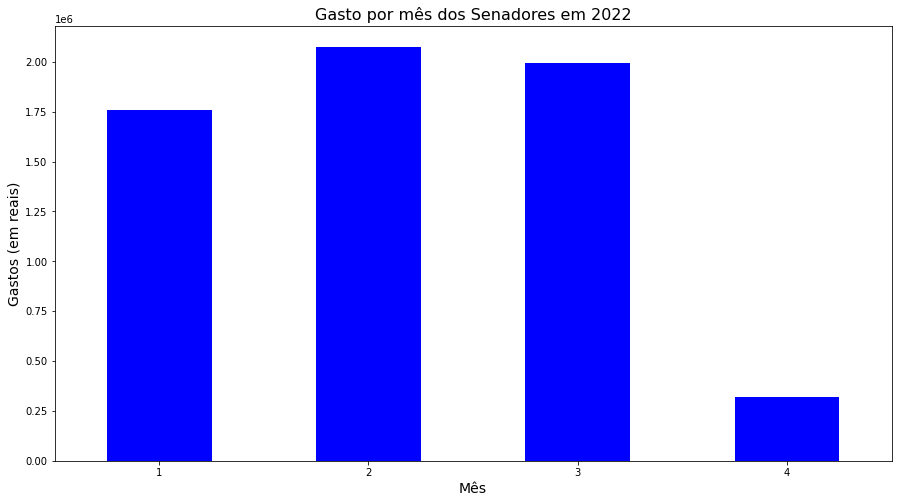

In [97]:
# Visualizando o Gasto total por mês dos Senadores

dados_relevantes.groupby(['MES']).VALOR_REEMBOLSADO.sum().plot(kind="bar", figsize=(15,8), rot=0, color="blue");
plt.title("Gasto por mês dos Senadores em 2022", fontsize=16)
plt.xlabel("Mês", fontsize=14);
plt.ylabel("Gastos (em reais)", fontsize=14);

In [102]:
print("O gasto total por mês dos Senadores foi, em reais:")
display(dados_relevantes.groupby(['SENADOR']).VALOR_REEMBOLSADO.sum())

O gasto total por mês dos Senadores foi, em reais:


SENADOR
ACIR GURGACZ               118819.53
ALESSANDRO VIEIRA          103241.02
ALEXANDRE SILVEIRA          71180.61
ALVARO DIAS                  6818.17
ANGELO CORONEL              96220.14
                             ...    
VENEZIANO VITAL DO RÊGO     66114.53
WELLINGTON FAGUNDES         45315.74
WEVERTON ROCHA              94343.13
ZENAIDE MAIA                66813.11
ZEQUINHA MARINHO           130080.32
Name: VALOR_REEMBOLSADO, Length: 80, dtype: float64

**Analisamos que o Senador que mais gastou até o momento em 2022, foi o Senador ACIR GURGACZ**